# <p align="center">LIFE EXPECTANCY PREDICTION</p>

## I. Overview
<p align="center">
  <img src="https://www.worldatlas.com/upload/b3/c2/b2/shutterstock-1350757706.jpg" width="60%" />
</p>


Python - ngôn ngữ lập trình bậc cao dễ đọc, dễ học, dễ nhớ, rất thân thiện cho người mới học lập trình. Nó có nhiều ưu điểm nên được nhiều người sử dụng, tạo nên cộng đồng lập trình viên rộng lớn. Một trong những ưu điểm ưu điểm nổi bật là hệ thống thư viện có ứng dụng cao cho khoa học, tính toán số liệu.

Tuổi thọ con người là chủ đề được mọi người quan tâm. Có rất nhiều nghiên cứu về tuổi thọ con người nhưng vẫn còn số hạn chế trong quá khứ, điều đó cần được giải quyết thông qua xây dựng mô hình hồi quy với Python.
   
**Mục tiêu:** Xây dựng mô hình giúp dự đoán tuổi thọ bằng ngôn ngữ Python.
    
**Đặc trưng của dataset:** Bộ dữ liệu Life Expectancy, ghi nhận bởi WHO từ năm 2000-2015 cho 193 quốc gia. Tệp dữ liệu này bao gồm 22 Cột và 2938 hàng. Do tuổi thọ có tính phụ thuộc vào các nhân tố khác có trong dataset, nên ta sử dụng thuật toán Linear Regression để xây dựng mô hình dự đoán tuổi thọ.

## II. Steps
1. Read and understand the Data 
2. Data Preprocessing 
3. Exploratory Data Analysis  
4. Model Building  

### 1. Read and understand the data 

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.shape

(2938, 22)

In [4]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [5]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [7]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n",num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n",cat_col)

Numerical columns: 
 Index(['Year', 'Life expectancy ', 'Adult Mortality', 'infant deaths',
       'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country', 'Status'], dtype='object')


### 2. Data Preprocessing

In [9]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [10]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Status'. 
df['Status']= label_encoder.fit_transform(df['Status'])
df['Status'].unique()

array([1, 0])

In [11]:
# Number of null value in the column
print(df.isnull().sum())
print(df.shape)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64
(2938, 22)


In [12]:
#Delete columns with null values
df = df.dropna()

In [13]:
df.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [14]:
df.shape

(1649, 22)

### 3. Exploratory Data Analysis 

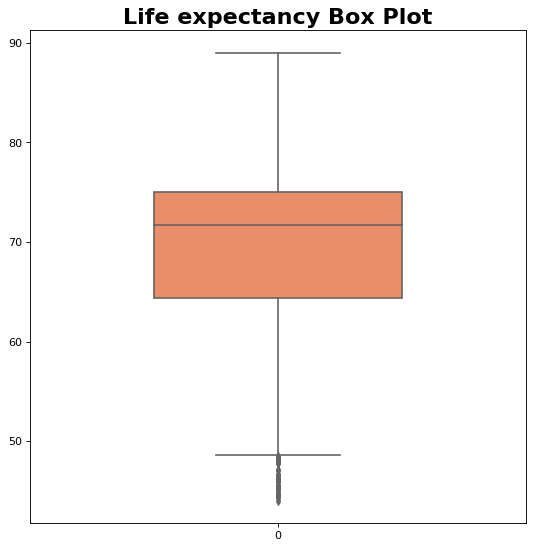

In [15]:
# Let's check the distribution of y variable (Life Expectancy)
plt.figure(figsize=(8,8), dpi=80)
sns.boxplot(df['Life expectancy '], color='#FF8552', width=0.5)
plt.title('Life expectancy Box Plot', fontsize=20, fontweight='bold')
plt.show()

<Axes: title={'center': 'Life expantancy Distribution Plot'}, xlabel='Life expectancy ', ylabel='Density'>

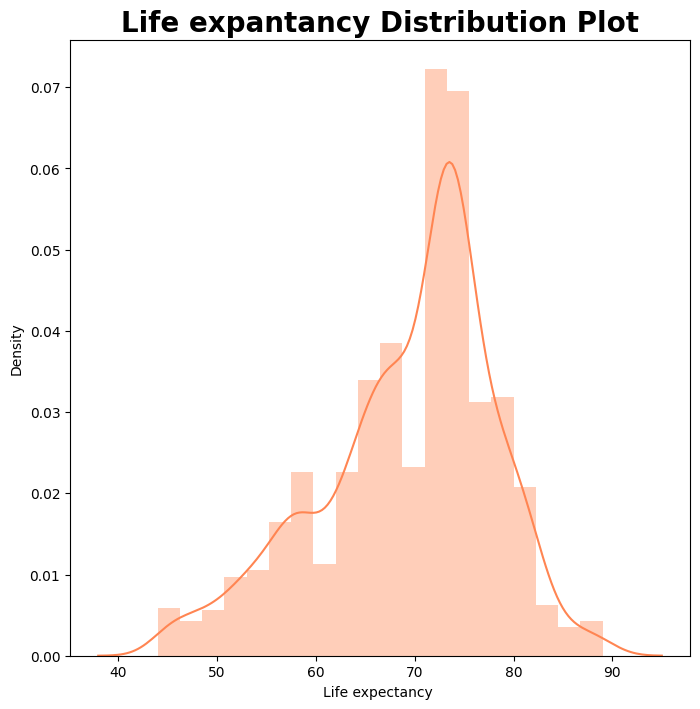

In [16]:
plt.figure(figsize=(8,8))
plt.title('Life expantancy Distribution Plot', fontsize=20, fontweight='bold')
sns.distplot(df['Life expectancy '], bins=20, color='#FF8552')

#### Xem sự ảnh hưởng của các khả năng đối với tuổi thọ sử dụng heatmap

In [17]:
num_col = df.select_dtypes(include=np.number).columns
print("Numerical columns: \n", num_col)

cat_col = df.select_dtypes(exclude=np.number).columns
print("Categorical columns: \n", cat_col)

Numerical columns: 
 Index(['Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')
Categorical columns: 
 Index(['Country'], dtype='object')


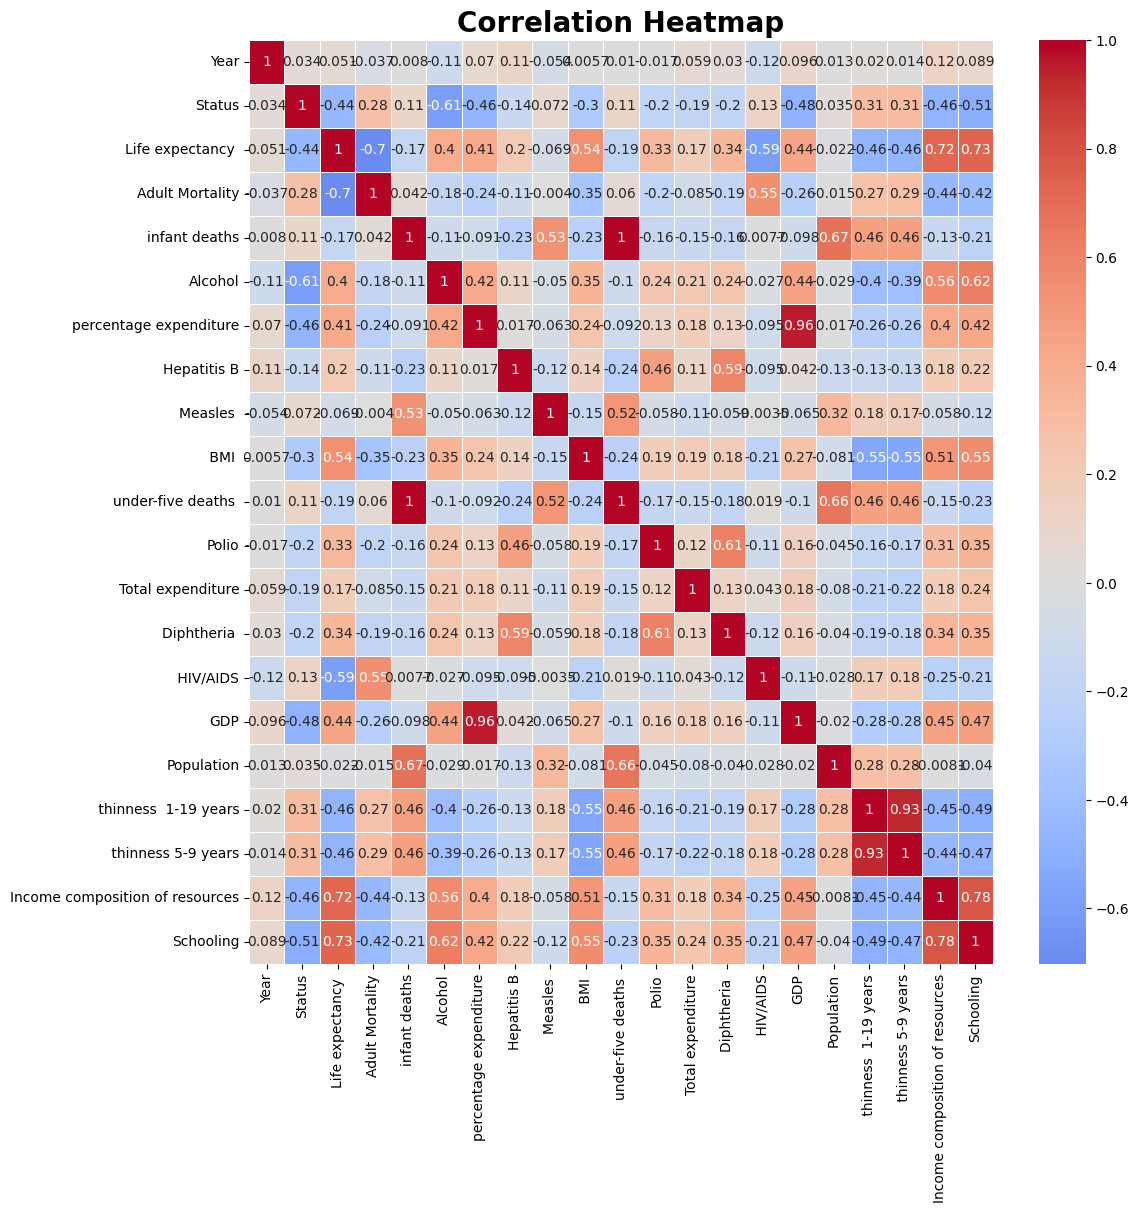

In [18]:
plt.figure(figsize=(12, 12))
num_col = df.select_dtypes(include='number').columns
flare_palette = sns.color_palette("coolwarm", as_cmap=True)
heatmap = sns.heatmap(df[num_col].corr(), annot=True, cmap=flare_palette, center=0, linewidths=.5)
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.show()

- Biến có giá trị âm thể hiện tương quan nghịch
- Biến có giá trị dương thể hiện tương quan thuận
- Nhìn vào heatmap có thể thấy giá trị tương quan của biến 'Adult Mortality' với biến 'life expectancy' = -0.7 ~ -1 nên thể hiện giá trị tương quan nghịch, ảnh hưởng xấu nhất đến tuổi thọ
- Giá trị tương quan của biến 'Schooling' với biến 'life expectancy' = 0.7 ~ 1 nên thể hiện tương quan thuận, ảnh hưởng tốt nhất đến tuổi thọ.

### Model buiding using linear regression



In [19]:
# Train test split
x = df.drop(columns = ['Life expectancy ', 'Country'])
y = df[['Life expectancy ']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1234)
# Chia thành 2 bộ dữ liệu _train, _test.
#_train là để tạo mô hình. 
#_test để kiểm tra độ chính xác của mô hình

In [20]:
x_train.shape

(1154, 20)

In [21]:
x_test.shape

(495, 20)

In [22]:
y_train.shape

(1154, 1)

In [23]:
y_test.shape

(495, 1)

### Building model with 1 variable
```python
y = B1*x + B0
```

https://www.statsmodels.org/stable/index.html

In [24]:
x_train1 = x_train[['Income composition of resources']]
x_train1

,Income composition of resources
1652,0.509
2491,0.539
300,0.000
855,0.404
1388,0.000
...,...
2067,0.789
1816,0.538
2272,0.749
1285,0.877


In [25]:
# Create a column to find the value of B0.
x_train1 = sm.add_constant(x_train1)
x_train1

,const,Income composition of resources
1652,1.0,0.509
2491,1.0,0.539
300,1.0,0.000
855,1.0,0.404
1388,1.0,0.000
...,...,...
2067,1.0,0.789
1816,1.0,0.538
2272,1.0,0.749
1285,1.0,0.877


In [26]:
# Xây dựng model dựa vào y_train, x_train1. 
model_1 = sm.OLS(y_train, x_train1).fit()

In [27]:
# Xác định giá trị B0, B1. 
model_1.params

const                              47.608112
Income composition of resources    34.589893
dtype: float64

In [28]:
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.519
Method:                 Least Squares   F-statistic:                     1243.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          2.92e-185
Time:                        13:12:22   Log-Likelihood:                -3716.8
No. Observations:                1154   AIC:                             7438.
Df Residuals:                    1152   BIC:                             7448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- p_value = 0 < 0.05 nên biến 'Income composition of resources' quan trọng trong việc xây dựng xây dựng mô hình.
- Tuy nhiên r_2 = 0.519. Điều nay cho thấy biến 'Life expectancy' còn phụ thuộc vào nhiều biến khác trong df.

### Build model with 2 variable
```python
y = B1*x1 + B2*x2 + B0
```

In [29]:
x_train2 = x_train[['Income composition of resources', 'Schooling']]
x_train2

,Income composition of resources,Schooling
1652,0.509,8.5
2491,0.539,11.4
300,0.000,8.4
855,0.404,5.1
1388,0.000,12.2
...,...,...
2067,0.789,15.8
1816,0.538,12.3
2272,0.749,13.5
1285,0.877,16.6


In [30]:
x_train2 = sm.add_constant(x_train2)

In [31]:
model_2 = sm.OLS(y_train, x_train2).fit()

In [32]:
# Xác định giá trị B0, B1, B2
model_2.params

const                              41.448765
Income composition of resources    18.126951
Schooling                           1.362955
dtype: float64

In [33]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.590
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     828.4
Date:                Sat, 02 Dec 2023   Prob (F-statistic):          1.28e-223
Time:                        13:12:22   Log-Likelihood:                -3624.4
No. Observations:                1154   AIC:                             7255.
Df Residuals:                    1151   BIC:                             7270.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- Ta thấy các biến 'Income composition of resources', 'Schooling' có giá trị p_value = 0 < 0.05. Điều này cho thấy các biến 'Income composition of resources', 'Schooling' có vai trò quan trọng trong việc xây dưng mô hình. 
- Tuy nhiên r_2 = 0.59. Điều nay cho thấy biến 'Life expectancy' còn phụ thuộc vào nhiều biến khác trong df.

### Building model with 3 variable

In [34]:
x_train3 = x_train[['Income composition of resources', 'Schooling', 'Adult Mortality']]

In [35]:
x_train3 = sm.add_constant(x_train3)

In [36]:
model_3 = sm.OLS(y_train, x_train3).fit()

In [37]:
# Xác định giá trị B0, B1, B2, B3. 
model_3.params

const                              53.942203
Income composition of resources    12.044169
Schooling                           1.074392
Adult Mortality                    -0.030965
dtype: float64

In [38]:
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     1079.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -3366.6
No. Observations:                1154   AIC:                             6741.
Df Residuals:                    1150   BIC:                             6761.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- Ta thấy các biến 'Income composition of resources', 'Schooling', 'Adult Mortality' có giá trị p_value = 0 < 0.05. Điều này cho thấy các biến 'Income composition of resources', 'Schooling', 'Adult Mortality' có vai trò quan trọng trong việc xây dưng mô hình. 
- Hệ số R_2 = 0.738 vẫn chưa đủ cao để xây dựng một mô hình dự đoán tốt. Nên có thể thấy biến 'life expectancy' còn phụ thuộc thuộc vào nhiều biến khác trong df.
- Bây giờ chúng ta sẽ xây dựng mô hình với tất cả các biến. 

### Build model with all variables of df

In [39]:
# Mô hình với tất cả các biến. 
x_train4 = x_train
x_train4 = sm.add_constant(x_train4)
model_4 = sm.OLS(y_train, x_train4).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     291.7
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -3091.0
No. Observations:                1154   AIC:                             6224.
Df Residuals:                    1133   BIC:                             6330.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- Chúng ta thấy được mô hình có R_2 = 0,823 đây là mộ hệ số R_2 cao để có mô hình dự đoán tốt.
- Tuy nhiên chúng ta có thể thấy có nhiều biến có p_value > 0.05 điều đó cho thấy có nhiều biến không ảnh hưởng đến biến 'life expectancy' nên mô hình vẫn chưa tối ưu.
- Bây giờ chúng ta sẽ loại bỏ lần lượt giá trị p_value ra khỏi mô hình. 

In [40]:
# Loại bỏ biến 'Population'. 
x_train4_1 = x_train4.drop(['Population'], axis=1)
x_train4_1 = sm.add_constant(x_train4_1)
model4_1 = sm.OLS(y_train, x_train4_1).fit()
print(model4_1.summary()) 

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     307.3
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -3091.0
No. Observations:                1154   AIC:                             6222.
Df Residuals:                    1134   BIC:                             6323.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [41]:
#Loại bỏ biến 'GDP'
x_train4_2 = x_train4_1.drop(['GDP'], axis=1)
x_train4_2 = sm.add_constant(x_train4_2)
model4_2 = sm.OLS(y_train, x_train4_2).fit()
print(model4_2.summary()) 

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     324.6
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -3091.1
No. Observations:                1154   AIC:                             6220.
Df Residuals:                    1135   BIC:                             6316.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [42]:
# Loại bỏ biến 'thinness 5-9 years'
x_train4_3 = x_train4_2.drop([' thinness 5-9 years'], axis=1)
x_train4_3 = sm.add_constant(x_train4_3)
model4_3 = sm.OLS(y_train, x_train4_3).fit()
print(model4_3.summary()) 

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     343.9
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -3091.2
No. Observations:                1154   AIC:                             6218.
Df Residuals:                    1136   BIC:                             6309.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [43]:
# Loại bỏ biến 'Hepatitis B'
x_train4_4 = x_train4_3.drop(['Hepatitis B'], axis=1)
x_train4_4 = sm.add_constant(x_train4_4)
model4_4 = sm.OLS(y_train, x_train4_4).fit()
print(model4_4.summary()) 

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     365.5
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -3091.5
No. Observations:                1154   AIC:                             6217.
Df Residuals:                    1137   BIC:                             6303.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [44]:
# Loại bỏ biến 'Measles'
x_train4_5 = x_train4_4.drop(['Measles '], axis=1)
x_train4_5 = sm.add_constant(x_train4_5)
model4_5 = sm.OLS(y_train, x_train4_5).fit()
print(model4_5.summary()) 

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     389.9
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -3092.0
No. Observations:                1154   AIC:                             6216.
Df Residuals:                    1138   BIC:                             6297.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [45]:
# Loại bỏ biến 'Diphtheria'
x_train4_6 = x_train4_5.drop(['Diphtheria '], axis=1)
x_train4_6 = sm.add_constant(x_train4_6)
model4_6 = sm.OLS(y_train, x_train4_6).fit()
print(model4_6.summary()) 

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     417.6
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -3092.5
No. Observations:                1154   AIC:                             6215.
Df Residuals:                    1139   BIC:                             6291.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [46]:
# Loại bỏ biến 'Status'
x_train4_7 = x_train4_6.drop(['Status'], axis=1)
x_train4_7 = sm.add_constant(x_train4_7)
model4_7 = sm.OLS(y_train, x_train4_7).fit()
print(model4_7.summary()) 

                            OLS Regression Results                            
Dep. Variable:       Life expectancy    R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     448.8
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        13:12:22   Log-Likelihood:                -3094.0
No. Observations:                1154   AIC:                             6216.
Df Residuals:                    1140   BIC:                             6287.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

- Sau khi loại bỏ các giá trị p_value > 0.05, r_square = 0.837 điều đó cho thấy các biến đó không có ảnh hưởng đến biến 'Life expectancy'. Mô hình được tối ưu. 

In [47]:
x_test_model = x_test.drop(['Population', 'GDP', ' thinness 5-9 years', 'Hepatitis B', 'Measles ', 'Diphtheria ', 'Status'], axis=1)
x_test_model = sm.add_constant(x_test_model)
actual = y_test["Life expectancy "]
prediction = model4_7.predict(x_test_model)

In [48]:
df_compare = pd.DataFrame({'y': actual, 'y_preds': prediction, 'difference': actual - prediction})
df_compare

,y,y_preds,difference
2220,66.9,67.366096,-0.466096
2372,67.1,68.298773,-1.198773
1078,58.1,64.038246,-5.938246
1390,64.7,63.071837,1.628163
578,74.4,72.653257,1.746743
...,...,...,...
2374,66.5,67.742737,-1.242737
2206,76.0,71.864424,4.135576
1775,54.0,49.820779,4.179221
135,84.0,80.630613,3.369387


In [49]:
df_ = df_compare[df_compare['difference'] < 5]
df_.shape

(464, 3)

=> Đa số giá trị dự đoán có độ chênh lệch không quá lớn với các giá trị thực tương ứng (có một số ít trường hợp giá trị dự đoán chênh lệnh với giá trị thực hơn 5 đơn vị - năm). Mô hình dự đoán tương đối tốt.

## III. Conclusion

Python có vai trò, lợi ích đối với vấn đề phân tích, nghiên cứu liên quan đến dự đoán tuổi thọ nói riêng và ngành Khoa học Dữ liệu nói chung. Chương trình Python áp dụng các thư viện hỗ trợ: pandas, matplotlib, sklearn... và với các câu lệnh rõ ràng, góp phần làm cho bài nghiên cứu trở nên sinh động, trực quan và đạt hiệu quả.

Một số kết luận được rút ra thông qua việc phân tích dữ liệu và sử dụng Linear Regression:
- Tỷ lệ tử vong ở người lớn, số năm đi học, cơ cấu thu nhập của nguồn lực... là những yếu tố tác động nhiều nhất đến tuổi thọ.
- Mô hình có ít biến nhân tố ảnh hưởng cho ra khả năng dự đoán chưa hiệu quả, mô hình có tất cả nhân tố ảnh hưởng cho ra khả năng dự đoán tốt.
- Một số nhân tố như dân số, GDP...không có ảnh hưởng sâu sắc đến tuổi thọ con người ở các nước.